In [138]:
import advent
import itertools
import numpy as np
import matplotlib.pyplot as plt

data = advent.get_lines('14')

coords = [line.split(' -> ') for line in data]
#np.flatten(coords)
coords_flat = list(itertools.chain(*coords))


x = [int(i.split(',')[0]) for i in coords_flat]
y = [int(i.split(',')[1]) for i in coords_flat]
print(min(x), max(x), min(y), max(y))

493 567 15 172


In [139]:
board = np.zeros((600, 200))
#board = np.zeros((510, 20)) # for small

for line in data:
    coords = line.split(' -> ')
    for i in range(len(coords)-1):
        a = list(map(int, coords[i].split(',')))
        b = list(map(int, coords[i+1].split(',')))

        if a[0] == b[0] and a[1] < b[1]: board[a[0], a[1]:(b[1]+1)] = 1
        if a[0] == b[0] and a[1] > b[1]: board[a[0], b[1]:(a[1]+1)] = 1
        elif a[1] == b[1] and a[0] < b[0]: board[a[0]:(b[0]+1), a[1]] = 1
        elif a[1] == b[1] and a[0] > b[0]: board[b[0]:(a[0]+1), a[1]] = 1


In [161]:
tadd = lambda a, b: (a[0] + b[0], a[1] + b[1])

def fall_sand(board, sand=(0,20), floor=None):
    #print(f"Sand now at {sand}")
    
    if board[sand] == 1: return None # should only happen if the start is covered
    # if there is a floor and we hit it, done
    if (sand[0]+1) == floor: return sand
    # assume the left/down/right edges of the board are entirely clear of rocks
    # return None if sand will go into abyss
    if (sand[0]+1) >= board.shape[0]: return None
    if sand[1] < 1 or (sand[1]+1) >= board.shape[1]: return None
    if board[tadd(sand, (1, 0))] == 0:
        return fall_sand(board, tadd(sand, (1, 0)), floor)
    if board[tadd(sand, (1, -1))] == 0:
        return fall_sand(board, tadd(sand, (1, -1)), floor)
    if board[tadd(sand, (1, 1))] == 0:
        return fall_sand(board, tadd(sand, (1, 1)), floor)
    return sand
    

In [162]:
board_t = board.copy()[480:,:].transpose()
sand_counter = 0

while True:
    sand_counter += 1
    new_sand = fall_sand(board_t)
    if new_sand is None: break
    board_t[new_sand] = 1

print(sand_counter - 1) # The last sand failed so didn't count
    

698


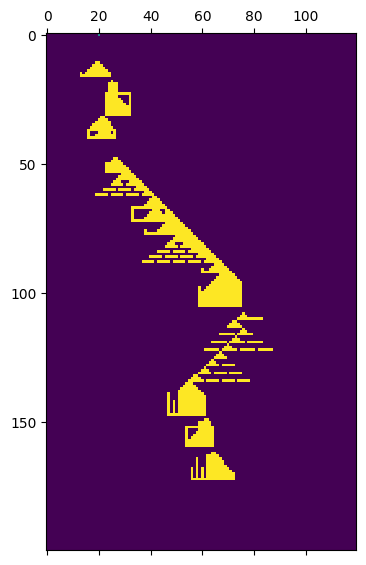

In [163]:
board_t[(0, 20)] = 0.5
plt.matshow(board_t)

In [166]:
# for part 2, I changed the 'fall_sand' function to accept a floor parameter
# also, the board must contain all the sand, so I gave it a 200 buffer on each side

floor = max(y) + 2 # from the first cell

board_t = board.copy()[480:,:].transpose()
large_board = np.zeros((200, 500))
large_board[:, 200:300] = board_t[:, 0:100]

large_start = (0, 220)

sand_counter = 0

while True:
    sand_counter += 1
    new_sand = fall_sand(large_board, large_start, floor)
    if new_sand is None: break
    #print(f"Placing sand at {new_sand}")
    large_board[new_sand] = 1

print(sand_counter - 1) # The last sand failed so didn't count


28594


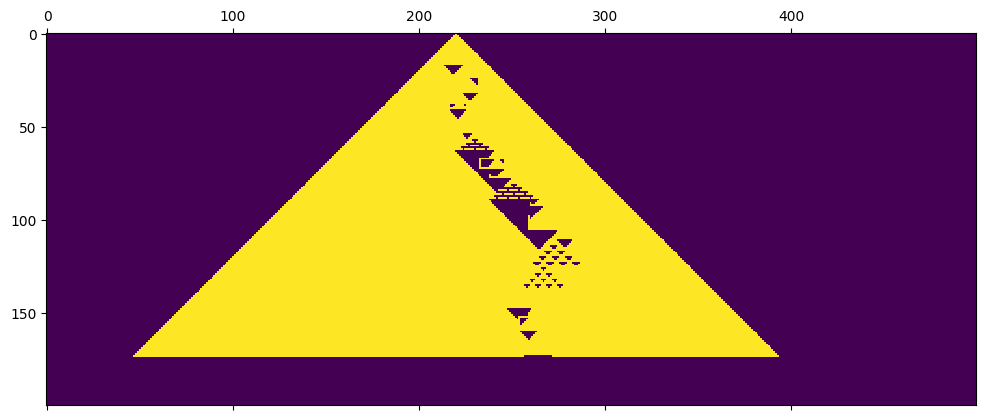

In [167]:
plt.matshow(large_board)